In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sp = pd.read_csv("../data/raw/sp500_daily.csv", index_col=0, parse_dates=True)
vix = pd.read_csv("../data/raw/vix_daily.csv", index_col=0, parse_dates=True)

print(sp.head(3))
print(sp.tail(3))

                        Close    High                 Low     Open     Volume
Price                                                                        
Ticker                  ^GSPC   ^GSPC               ^GSPC    ^GSPC      ^GSPC
Date                      NaN     NaN                 NaN      NaN        NaN
2000-01-03  1455.219970703125  1478.0  1438.3599853515625  1469.25  931800000
                       Close             High               Low  \
Price                                                             
2025-12-30    6896.240234375          6913.25  6893.47021484375   
2025-12-31            6845.5   6901.419921875   6844.5498046875   
2026-01-02  6858.47021484375  6894.8701171875  6824.31005859375   

                        Open      Volume  
Price                                     
2025-12-30  6900.43994140625  3309930000  
2025-12-31  6898.81982421875  3261830000  
2026-01-02  6878.10986328125  4184120000  


/var/folders/lq/zlwx5k6j4sx633khpfjxxb6w0000gn/T/ipykernel_52095/2200826438.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp = pd.read_csv("../data/raw/sp500_daily.csv", index_col=0, parse_dates=True)
/var/folders/lq/zlwx5k6j4sx633khpfjxxb6w0000gn/T/ipykernel_52095/2200826438.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vix = pd.read_csv("../data/raw/vix_daily.csv", index_col=0, parse_dates=True)


In [4]:
# --- FIX MULTIINDEX COLUMNS ---
if isinstance(sp.columns, pd.MultiIndex):
    sp.columns = sp.columns.droplevel(0)

if isinstance(vix.columns, pd.MultiIndex):
    vix.columns = vix.columns.droplevel(0)

print(sp.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [7]:
# CELL: robust CSV cleaning and sanity checks
import pandas as pd
import numpy as np
from pathlib import Path
pd.options.display.max_rows = 12
pd.options.display.max_columns = 10

# load (if you're already using sp from before, this will use that)
sp_path = Path("../data/raw/sp500_daily.csv")
sp = pd.read_csv(sp_path, index_col=0, parse_dates=False)  # parse_dates=False to avoid silent coercion
print("RAW shape:", sp.shape)
print("RAW dtypes:\n", sp.dtypes)

# Quick peek first 8 rows (raw)
print("\nRAW head (first 8 rows):")
display(sp.head(8))

# --- STEP A: Ensure index is datetime (coerce bad index entries to NaT) ---
idx_dt = pd.to_datetime(sp.index, errors='coerce')
bad_idx_count = idx_dt.isna().sum()
print(f"\nIndex -> to_datetime coercion: {bad_idx_count} bad rows (will be dropped).")
sp.index = idx_dt
sp = sp[~sp.index.isna()]  # drop rows where index could not be parsed

# --- STEP B: Coerce numeric columns to numeric (force strings -> NaN where invalid) ---
num_cols = ['Close','Open','High','Low','Volume']
existing_num_cols = [c for c in num_cols if c in sp.columns]
for c in existing_num_cols:
    sp[c] = pd.to_numeric(sp[c], errors='coerce')

# count NaNs before drop
nan_counts = sp[existing_num_cols].isna().sum()
print("\nNaN counts per numeric column (after coercion):")
print(nan_counts)

# Drop rows missing Close (essential)
before_rows = len(sp)
sp = sp.dropna(subset=['Close'])
dropped = before_rows - len(sp)
print(f"\nDropped {dropped} rows missing Close (essential).")

# Final housekeeping
sp = sp.sort_index()
sp = sp[~sp.index.duplicated(keep='first')]

# Final peek
print("\nCLEAN shape:", sp.shape)
print("\nCLEAN head (first 6 rows):")
display(sp.head(6))
print("\nCLEAN tail (last 6 rows):")
display(sp.tail(6))

# Return cleaned df into workspace under variable name `sp_clean`
sp_clean = sp.copy()


RAW shape: (6542, 5)
RAW dtypes:
 Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

RAW head (first 8 rows):


,Close,High,Low,Open,Volume
Price,,,,,
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,NaN,NaN,NaN,NaN,NaN
2000-01-03,1455.219970703125,1478.0,1438.3599853515625,1469.25,931800000
2000-01-04,1399.4200439453125,1455.219970703125,1397.4300537109375,1455.219970703125,1009000000
2000-01-05,1402.1099853515625,1413.27001953125,1377.6800537109375,1399.4200439453125,1085500000
2000-01-06,1403.449951171875,1411.9000244140625,1392.0999755859375,1402.1099853515625,1092300000
2000-01-07,1441.469970703125,1441.469970703125,1400.72998046875,1403.449951171875,1225200000
2000-01-10,1457.5999755859375,1464.3599853515625,1441.469970703125,1441.469970703125,1064800000



Index -> to_datetime coercion: 2 bad rows (will be dropped).

NaN counts per numeric column (after coercion):
Close     0
Open      0
High      0
Low       0
Volume    0
dtype: int64

Dropped 0 rows missing Close (essential).

CLEAN shape: (6540, 5)

CLEAN head (first 6 rows):


/var/folders/lq/zlwx5k6j4sx633khpfjxxb6w0000gn/T/ipykernel_52095/2260972768.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx_dt = pd.to_datetime(sp.index, errors='coerce')


,Close,High,Low,Open,Volume
Price,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000
2000-01-10,1457.599976,1464.359985,1441.469971,1441.469971,1064800000



CLEAN tail (last 6 rows):


,Close,High,Low,Open,Volume
Price,,,,,
2025-12-24,6932.049805,6937.319824,6904.910156,6904.910156,1798270000
2025-12-26,6929.939941,6945.770020,6921.600098,6936.020020,2586550000
2025-12-29,6905.740234,6920.209961,6888.759766,6903.600098,3541750000
2025-12-30,6896.240234,6913.250000,6893.470215,6900.439941,3309930000
2025-12-31,6845.500000,6901.419922,6844.549805,6898.819824,3261830000
2026-01-02,6858.470215,6894.870117,6824.310059,6878.109863,4184120000


In [8]:
df = sp_clean.copy()

# Log returns
df['log_return'] = np.log(df['Close']).diff()

# Realized volatility (21-day rolling, annualized)
df['vol_21'] = df['log_return'].rolling(21).std() * np.sqrt(252)

# Drop warm-up NaNs
df = df.dropna()

df[['log_return','vol_21']].describe()


,log_return,vol_21
count,6519.000000,6519.000000
mean,0.000243,0.163709
std,0.012199,0.106086
min,-0.127652,0.034688
25%,-0.004736,0.098257
50%,0.000643,0.136593
75%,0.005861,0.197615
max,0.109572,0.975552


In [9]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df['log_return'])
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])


ADF Statistic: -20.215874284444148
p-value: 0.0


In [10]:
from sklearn.preprocessing import StandardScaler

features = df[['log_return', 'vol_21']].copy()

scaler = StandardScaler()
X = scaler.fit_transform(features)

print("Feature matrix:", X.shape)


Feature matrix: (6519, 2)


In [14]:
from hmmlearn.hmm import GaussianHMM
import numpy as np

def select_hmm(X, n_states=range(2,6)):
    records = []

    for k in n_states:
        best_score = -np.inf
        best_model = None

        for seed in range(5):
            model = GaussianHMM(
                n_components=k,
                covariance_type='diag',
                n_iter=500,
                random_state=seed
            )
            model.fit(X)
            score = model.score(X)

            if score > best_score:
                best_score = score
                best_model = model

        n_params = k*(k-1) + k*X.shape[1] + k*X.shape[1]
        bic = -2*best_score + n_params*np.log(len(X))

        records.append((k, best_score, bic, best_model))
        print(f"States={k}  LogL={best_score:.2f}  BIC={bic:.2f}")

    return min(records, key=lambda x: x[2])

best_k, best_score, best_bic, model = select_hmm(X)
assert best_k == 5, "Unexpected number of regimes selected"
print(f"\nSELECTED STATES = {best_k}")

States=2  LogL=-12458.20  BIC=25004.23
States=3  LogL=-9710.95  BIC=19579.99
States=4  LogL=-7893.28  BIC=16032.48
States=5  LogL=-6571.74  BIC=13494.78

SELECTED STATES = 5


In [16]:
hidden_states = model.predict(X)

df['regime'] = hidden_states
df['regime'].value_counts().sort_index()


regime
0    1045
1    1830
2     356
3    1724
4    1564
Name: count, dtype: int64

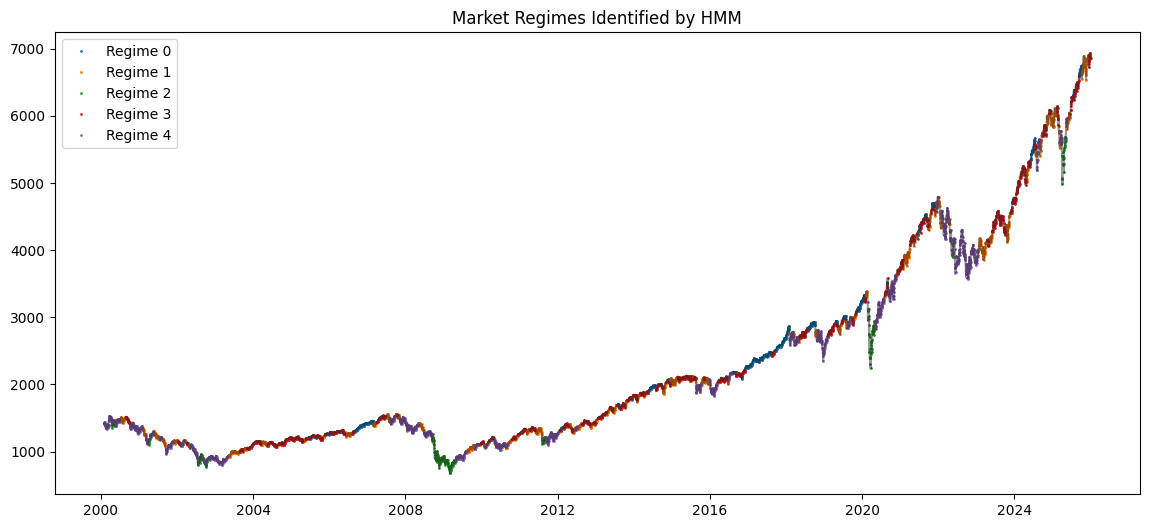

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,6))

for r in np.unique(hidden_states):
    mask = df['regime'] == r
    ax.plot(df.index[mask], df['Close'][mask], '.', label=f'Regime {r}', markersize=2)

ax.plot(df['Close'], color='black', alpha=0.4)
ax.set_title("Market Regimes Identified by HMM")
ax.legend()
plt.show()

In [18]:
regime_stats = df.groupby('regime').agg(
    mean_return=('log_return','mean'),
    volatility=('log_return','std'),
    avg_vol_21=('vol_21','mean'),
    obs=('regime','count')
)

regime_stats

,mean_return,volatility,avg_vol_21,obs
regime,,,,
0,0.000763,0.004644,0.071998,1045
1,0.000206,0.009493,0.149963,1830
2,-0.000622,0.032127,0.480588,356
3,0.000343,0.006738,0.103668,1724
4,0.000024,0.014694,0.235126,1564


In [20]:
N_REGIMES = best_k

trans_mat = model.transmat_
pd.DataFrame(trans_mat, 
             index=[f'From {i}' for i in range(N_REGIMES)], 
             columns=[f'To {i}' for i in range(N_REGIMES)])

,To 0,To 1,To 2,To 3,To 4
From 0,9.611553e-01,6.185205e-03,2.518552e-102,3.265947e-02,8.168480e-58
From 1,9.695012e-17,9.515821e-01,6.253469e-21,3.107432e-02,1.734356e-02
From 2,2.433242e-236,3.258955e-137,9.728471e-01,3.839477e-209,2.715292e-02
From 3,2.419468e-02,2.860109e-02,1.397200e-75,9.472042e-01,4.324354e-17
From 4,6.516962e-129,2.065866e-02,6.165757e-03,1.458376e-93,9.731756e-01


In [21]:
df['cum_return'] = df['log_return'].cumsum()

drawdowns = {}

for r in range(N_REGIMES):
    sub = df[df['regime'] == r]['cum_return']
    dd = (sub - sub.cummax()).min()
    drawdowns[r] = dd

drawdowns


{0: np.float64(-0.26548295747875184),
 1: np.float64(-0.4998455653661358),
 2: np.float64(-0.7810892638294362),
 3: np.float64(-0.4255266416650558),
 4: np.float64(-0.6458376913489063)}

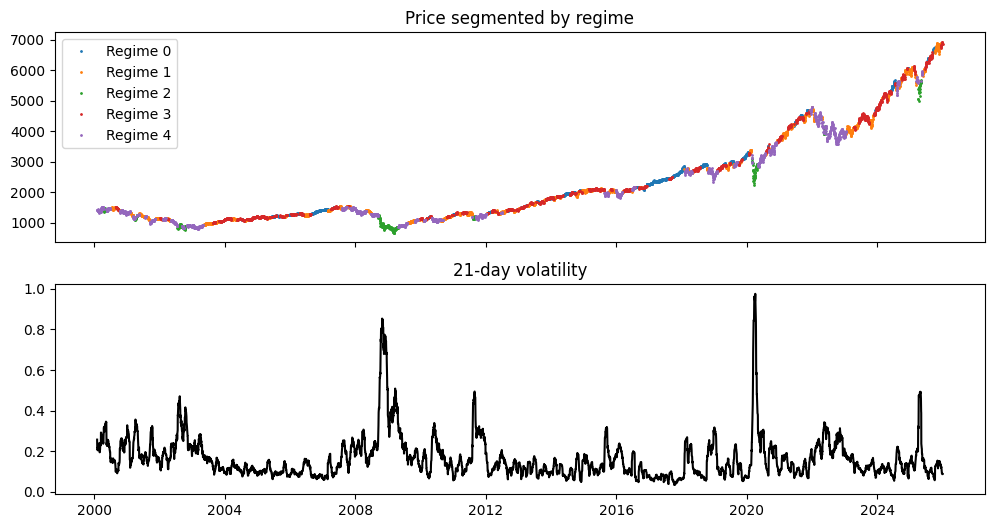

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True)

for r in range(N_REGIMES):
    mask = df['regime'] == r
    ax[0].plot(df.index[mask], df['Close'][mask], '.', markersize=2, label=f'Regime {r}')

ax[0].set_title("Price segmented by regime")
ax[0].legend()

ax[1].plot(df['vol_21'], color='black')
ax[1].set_title("21-day volatility")

plt.show()


In [23]:
from statsmodels.tsa.arima.model import ARIMA

returns = df['log_return'].copy()


In [27]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

def walk_forward_arima(series, train_ratio=0.7):
    series = series.reset_index(drop=True)
    n = len(series)
    split = int(n * train_ratio)

    preds = []
    actual = []

    for i in range(split, n - 1):
        train = series.iloc[:i]

        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            model = ARIMA(
                train,
                order=(1,0,1),
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit(method_kwargs={"maxiter": 200})

        forecast = model.forecast(steps=1).iloc[0]
        preds.append(forecast)
        actual.append(series.iloc[i + 1])

    return np.array(preds), np.array(actual)

arima_preds, arima_actual = walk_forward_arima(returns)

In [28]:
from sklearn.metrics import mean_squared_error

arima_mse = mean_squared_error(arima_actual, arima_preds)
direction_correct = np.mean(np.sign(arima_preds) == np.sign(arima_actual))

print("ARIMA MSE:", arima_mse)
print("ARIMA Direction Accuracy:", direction_correct)

ARIMA MSE: 0.00015798076556304755
ARIMA Direction Accuracy: 0.49769820971867007


In [29]:
regime_means = df.groupby('regime')['log_return'].mean()
regime_means


regime
0    0.000763
1    0.000206
2   -0.000622
3    0.000343
4    0.000024
Name: log_return, dtype: float64

In [30]:
df['regime_forecast'] = df['regime'].shift(1).map(regime_means)


In [31]:
mask = df['regime_forecast'].notna()

regime_preds = df.loc[mask, 'regime_forecast'].values
regime_actual = df.loc[mask, 'log_return'].values

regime_mse = mean_squared_error(regime_actual, regime_preds)
regime_dir_acc = np.mean(np.sign(regime_preds) == np.sign(regime_actual))

print("Regime MSE:", regime_mse)
print("Regime Direction Accuracy:", regime_dir_acc)

Regime MSE: 0.00014889246781972024
Regime Direction Accuracy: 0.5357471617060447


In [39]:
import os
print(os.getcwd())

/Users/unaisrahamath/Desktop/College Stuff/Projects/market_regime_hmm/notebooks


In [40]:
os.makedirs("results", exist_ok=True)
print("results folder created at:", os.path.abspath("results"))

results folder created at: /Users/unaisrahamath/Desktop/College Stuff/Projects/market_regime_hmm/notebooks/results


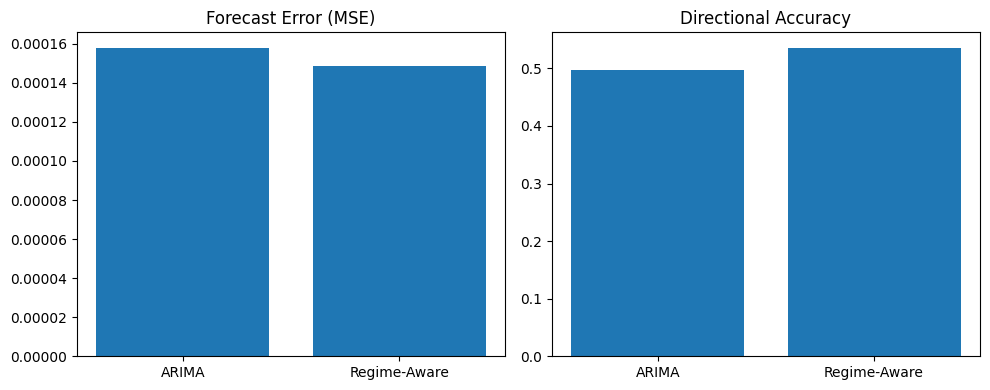

In [41]:
labels = ['ARIMA', 'Regime-Aware']
mse_values = [arima_mse, regime_mse]
dir_values = [direction_correct, regime_dir_acc]

fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].bar(labels, mse_values)
ax[0].set_title("Forecast Error (MSE)")

ax[1].bar(labels, dir_values)
ax[1].set_title("Directional Accuracy")

plt.tight_layout()
plt.savefig("results/performance_comparison.png", dpi=300)
plt.show()


In [42]:
results = pd.DataFrame({
    'Model': ['ARIMA', 'Regime-Aware'],
    'MSE': [arima_mse, regime_mse],
    'Direction_Accuracy': [direction_correct, regime_dir_acc]
})

results.to_csv('results/forecast_results.csv', index=False)
results


,Model,MSE,Direction_Accuracy
0,ARIMA,0.000158,0.497698
1,Regime-Aware,0.000149,0.535747
